# SQLAlchemy - Surfs Up Homework
#### By - Jonathan Salazar
In this assigment I use my knowledge of Python and SQLAlchemy to do basic climate analysis and data exploration of for a given climate database. All of the following analysis is completed using SQLAlchemy ORM queries, Pandas, and Matplotlib, and the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files.
![surfs-up.png](Images/surfs-up.png)

## Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

* Link Python to the database by creating an SQLAlchemy session.

In [1]:
#----Dependencies----
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func, inspect

In [3]:
# Define DB path
database_path = "Resources/hawaii.sqlite"

# Create engine to connect to the SQLite file
engine = create_engine(f"sqlite:///{database_path}")

Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Station = Base.classes.station
Measurement = Base.classes.measurement

### Inspect Tables and Keys

In [6]:
# Create session
session = Session(engine)

inspector = inspect(engine)

In [7]:
station_data = engine.execute("SELECT * FROM Station")

station_data.keys()

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])

In [8]:
station_data.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
columns = inspector.get_columns("Station")

for column in columns: 
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
measurement_data = engine.execute("SELECT * FROM Measurement")

measurement_data.keys()

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])

In [11]:
measurement_data.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [12]:
columns = inspector.get_columns("Measurement")

for column in columns: 
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## Precipitation Analysis

* Start by finding the most recent date in the data set.

* Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. **Note** you do not pass in the date as a variable to your query.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [13]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

latest_date

('2017-08-23',)

In [14]:
latest_date = dt.date(2017, 8, 23)

previous_year_date = latest_date - dt.timedelta(days=365)

print("Previous Year Date:", previous_year_date)

Previous Year Date: 2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
yearly_data = session.query(Measurement.prcp, Measurement.date)\
                                     .filter(Measurement.date >= previous_year_date)\
                                     .filter(Measurement.date < latest_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(yearly_data, columns=['prcp', 'date'])
prcp_df.set_index('date', inplace=True)
prcp_df = prcp_df.sort_index()
prcp_df = prcp_df.fillna(0)

prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


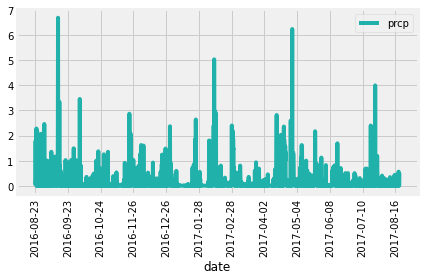

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(use_index=True, y='prcp', color='lightseagreen')

xtick_list = np.arange(0,prcp_df.shape[0],200)
ax.set_xticks(xtick_list)
# Rotate the xticks for the dates
ax.set_xticklabels([prcp_df.index[i] for i in xtick_list], rotation=90)

plt.tight_layout()
plt.show()

In [18]:
#Summary
prcp_df.describe()

,prcp
count,2226.000000
mean,0.160714
std,0.442392
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

* Design a query to calculate the total number of stations in the dataset.

* Design a query to find the most active stations (i.e. which stations have the most rows?).

  * List the stations and observation counts in descending order.

  * Which station id has the highest number of observations?

  * Using the most active station id, calculate the lowest, highest, and average temperature.

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Query the last 12 months of temperature observation data for this station.

  * Plot the results as a histogram with `bins=12`.

* Close out your session.

In [19]:
num_of_stations = session.query(Measurement.station).distinct().count()

print(f"Number of Stations = {num_of_stations}")

Number of Stations = 9


In [20]:
most_active = session.query(Measurement.station, func.count(Measurement.tobs)).\
                            group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# First row is the most active
most_active_station_id = most_active[0].station

values = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
              .filter(Measurement.station == most_active_station_id).all()

values

[(54.0, 85.0, 71.66378066378067)]

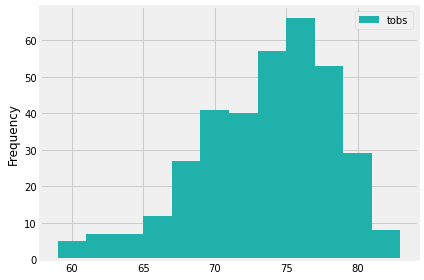

In [23]:
most_active_past_year = session.query(Measurement.tobs)\
                    .filter(Measurement.station == most_active_station_id)\
                    .filter(Measurement.date >= previous_year_date)\
                    .filter(Measurement.date < latest_date).all()

# Save the query results as a Pandas DataFrame and set the index to the tobs column
mapy_df = pd.DataFrame(most_active_past_year, columns=['tobs'])

# Plot the data
mapy_df.plot.hist(bins=12, color='lightseagreen')
plt.tight_layout()
plt.show()

## Bonus: Other Recommended Analyses

### Temperature Analysis

* You are looking to take a trip from August first to August seventh of this year, but are worried that the weather will be less than ideal. Using historical data in the dataset find out what the temperature has previously looked like.

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d`. The function will return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from a previous year (i.e., use "2017-08-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use "Trip Avg Temp" as the title.

  * Use the average temperature as the bar height (y value).

  * Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [24]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [34]:
start_date = latest_date - dt.timedelta(days=365)
end_date = start_date + dt.timedelta(days=10)

tmin, tavg, tmax = calc_temps(start_date, end_date)[0]
print(f'''tmin={tmin} 
tavg={tavg} 
tmax={tmax}''')

tmin=71.0 
tavg=78.43055555555556 
tmax=84.0


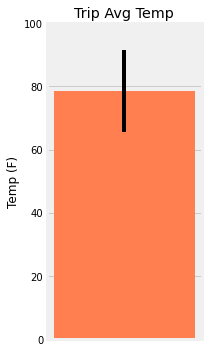

In [36]:
fig = plt.figure(figsize=(3,5))

plt.subplot()
plt.bar(x=0, height=tavg, yerr=(tmax-tmin), color='coral')
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.ylim(0,100)
plt.xticks([])

plt.tight_layout()
plt.show()

### Daily Rainfall Average

* Now that you have an idea of the temperature lets check to see what the rainfall has been, you don't want a when it rains the whole time!

* Calculate the rainfall per weather station using the previous year's matching dates.

  * Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures. You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic TOBS that match that date string.

  * Set the start and end date of the trip.

  * Use the date to create a range of dates.

  * Strip off the year and save a list of strings in the format `%m-%d`.

  * Use the `daily_normals` function to calculate the normals for each date string and append the results to a list called `normals`.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.


In [37]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip: based off 10 days starting with today @2017-8-23
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = latest_date
vacation_days = 10
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
vacation_dates = [(start_date + dt.timedelta(days=i)).strftime("%m-%d") for i in range(vacation_days)]
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(date)[0] for date in vacation_dates]
normals

[(67.0, 76.6923076923077, 87.0),
 (70.0, 75.96153846153847, 84.0),
 (69.0, 76.96078431372548, 82.0),
 (71.0, 76.56862745098039, 84.0),
 (68.0, 76.28301886792453, 84.0),
 (67.0, 76.73469387755102, 86.0),
 (70.0, 76.23529411764706, 85.0),
 (68.0, 76.41666666666667, 84.0),
 (67.0, 76.84, 85.0),
 (69.0, 77.0, 82.0)]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
normals_df

,tmin,tavg,tmax
0,67.0,76.692308,87.0
1,70.0,75.961538,84.0
2,69.0,76.960784,82.0
3,71.0,76.568627,84.0
4,68.0,76.283019,84.0
5,67.0,76.734694,86.0
6,70.0,76.235294,85.0
7,68.0,76.416667,84.0
8,67.0,76.840000,85.0
9,69.0,77.000000,82.0


<ipython-input-44-7c181b7df423>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vacation_dates, rotation=90)


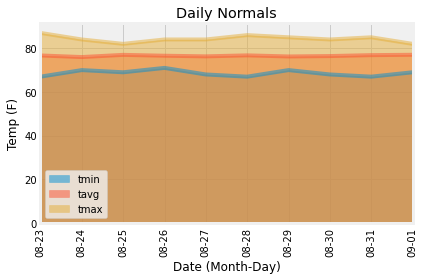

In [44]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df.plot.area(stacked=False)
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Date (Month-Day)')
ax.set_xlim(0,9)
ax.set_xticklabels(vacation_dates, rotation=90)
ax.set_title('Daily Normals')

plt.tight_layout()
plt.show()